<h1><center><font color='midnightblue'> Assignment Of Hypothesis Testing:</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
course_actions = pd.read_csv("course_page_actions.csv")
course_actions.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


<h2><font color='orangered'>Part 1:</font></h2>

<h2><center><font color='darkorange'>First we will clean the data from any errors:</font></center></h2>

<h2><center><font color='purple'>Error number 1;</font><font color='darkorange'>Checking if there is any null values:</font></center></h2>

In [3]:
course_actions.isnull().any()

timestamp    False
id           False
group        False
action       False
duration      True
dtype: bool

In [4]:
course_actions.isnull()["duration"].any()

True

<h3><font color='limegreen'> There is null values.</font></h3>

In [5]:
course_actions2 = course_actions.dropna()

In [6]:
course_actions2.isnull().any()

timestamp    False
id           False
group        False
action       False
duration     False
dtype: bool

In [7]:
course_actions2.isnull()["duration"].any()

False

<h3><font color='limegreen'> Now there is no any null values.</font></h3>

<h2><center><font color='purple'>Error number 2;</font> <font color='darkorange'>Checking if there is any duplicated values:</font></center></h2>

In [8]:
course_actions2.id.nunique()

4028

In [9]:
course_actions2.id.shape[0]

4044

<h3><font color='limegreen'> Here it shows that there is duplicated value:</font></h3>

In [10]:
print("The unique values: " , course_actions2.id.nunique())
print("The whole value: " , course_actions2.id.shape[0])

The unique values:  4028
The whole value:  4044


In [11]:
course_actions2.id.value_counts().nunique()

2

In [12]:
duplication = course_actions2[course_actions2.id.duplicated()]
duplication

,timestamp,id,group,action,duration
137,2016-09-28 02:08:53.050942,711838,experiment,enroll,201.785800
602,2016-10-10 11:30:33.838974,576318,experiment,enroll,176.921806
966,2016-10-21 20:18:42.363288,724590,experiment,enroll,99.759691
1008,2016-10-23 03:05:45.425012,314669,experiment,enroll,65.266778
1062,2016-10-24 13:30:25.843971,449244,experiment,enroll,61.008083
1346,2016-11-02 10:42:03.195112,381744,experiment,enroll,202.202458
1760,2016-11-14 10:19:07.520748,831767,experiment,enroll,202.693562
1897,2016-11-18 08:51:02.583154,655009,experiment,enroll,38.310541
1908,2016-11-18 16:27:37.381871,297986,experiment,enroll,110.370956
2288,2016-11-30 19:30:33.048605,645047,experiment,enroll,139.421324


<h3><font color='limegreen'> Removing error number 2 using <font color='purple'> drop</font> function.</font></h3>

In [13]:
course_actions = course_actions2.drop(duplication.index)

<h3><font color='limegreen'> Checking that error number 2 is truly removed.</font></h3>

In [14]:
course_actions2.shape[0]

4044

In [15]:
course_actions.shape[0] 

4028

In [16]:
course_actions.id.nunique() 

4028

In [17]:
print("The unique values: " , course_actions2.id.nunique())
print("The whole value: " , course_actions.id.shape[0])

The unique values:  4028
The whole value:  4028


<h3><font color='limegreen'> Now there is no any duplicated values.</font></h3>

<h2><center><font color='darkorange'> Now the data is clean of any errors:</font></center></h2>

<h2><font color='orangered'>Part 2:</font></h2>

<h2><center><p><font color='blue'>Test that average duration for the group <font color='crimson'>experiment</font> is bigger than the average duration in group <font color='crimson'>control</font>:<br><em><font color='crimson'>Alternative:</font> 
Avg(Experiment.duration)-Avg(control.duration)&gt;0</em><br><em><font color='crimson'>Null</font> 
Avg(Experiment.duration)-Avg(control.duration)&lt;=0</em></font></p></center></h2>

<h2><center><font color='blue'>Getting the average duration of the group <font color='crimson'>experiment</font>:</font></center></h2>

In [18]:
experiment_average = course_actions.query("group == 'experiment'").duration.mean()
print(f'The average duration of the group experiment is: {experiment_average}')

The average duration of the group experiment is: 130.89708218491765


<h2><center><font color='blue'>Getting the average duration of the group <font color='crimson'>control</font>:</font></center></h2>

In [19]:
control_average = course_actions.query("group == 'control'").duration.mean()
print(f'The average duration of the group control is: {control_average}')

The average duration of the group control is: 115.40710650582038


<h2><center><font color='blue'>Computing the observed difference in <font color='crimson'>course actions</font>:</font></center></h2>

In [20]:
obs_diff = experiment_average - control_average
print(f'The observed difference in course actions is: {obs_diff}')

The observed difference in course actions is: 15.48997567909727


<h2><center><font color='blue'>Creating <font color='crimson'>sampling distribution</font> of difference in average course actions:</font></center></h2>

In [21]:
alt_hyp = []
size = course_actions.shape[0]

for _ in range(10000) :
    a_sample = course_actions.sample(size , replace = True)
    experiment_average = a_sample.query("group == 'experiment'").duration.mean()
    control_average = a_sample.query("group == 'control'").duration.mean()
    alt_hyp.append(experiment_average - control_average)

<h2><center><font color='blue'>Putting the <font color='crimson'>sampling distribution</font> into array:</font></center></h2>

In [22]:
alt_hyp = np.array(alt_hyp)

<h2><center><font color='blue'>Plotting the <font color='crimson'>sampling distribution</font>:</font></center></h2>

(array([  18.,  166.,  672., 1775., 2877., 2619., 1384.,  400.,   83.,
           6.]),
 array([ 7.25735446,  8.96814945, 10.67894445, 12.38973945, 14.10053444,
        15.81132944, 17.52212444, 19.23291943, 20.94371443, 22.65450943,
        24.36530442]),
 <a list of 10 Patch objects>)

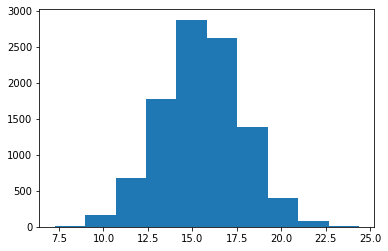

In [23]:
plt.hist(alt_hyp)

<h2><center><font color='blue'>Simulating the distribution under the <font color='crimson'>null hypothesis</font>:</font></center></h2>

In [24]:
null_hyp = np.random.normal(0, alt_hyp.std(), alt_hyp.size)

<h2><center><font color='blue'>Plotting the <font color='crimson'>null hypothesis</font><br>Plotting a line for <font color='crimson'>observed statistic</font>:</font></center></h2>

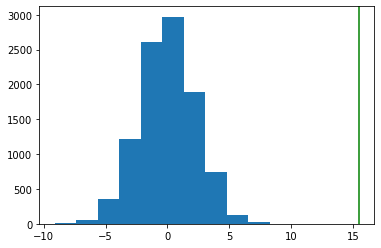

In [25]:
plt.hist(null_hyp)

plt.axvline(obs_diff , c = 'green')

<h2><center><font color='blue'> Computing the <font color='crimson'>p-value</font>:</font></center></h2>

In [26]:
p_value = (null_hyp > obs_diff).mean()
print(f'The p-value is: {p_value}')

The p-value is: 0.0


<h3><font color='limegreen'>We will reject the alternative hypothesis.</font></h3>